## **Importing Libraries**

In [120]:
from sklearn.datasets import fetch_20newsgroups
# from nltk.tokenize import word_tokenize #Used to extract words from documents
# from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

import sys
from time import time

import pandas as pd
import numpy as np

In [121]:
# from nltk.tokenize import word_tokenize #Used to extract words from documents
from nltk.stem import WordNetLemmatizer #Used to lemmatize words


In [122]:
import nltk

## **Reading 20 Newsgroups Dataset**

In [123]:
# Selected 3 categories from the 20 newsgroups dataset

categories = [
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

print("Loading 20 newsgroups dataset for categories:")
print(categories)

Loading 20 newsgroups dataset for categories:
['talk.religion.misc', 'comp.graphics', 'sci.space']


In [124]:
News_df = fetch_20newsgroups(subset='all', categories=categories, 
                             shuffle=False, remove=('headers', 'footers', 'quotes'))

In [125]:
News_df.data[0]

'\n\nI think I can. Largely as a result of efforts by people reading this group\nwriting letters and making phone calls the following has happened:\n\n1. NASA reprogrammed funds to keep NASP alive in 1991.\n2. Efforts to kill DC-X and the SSRT progam where twice twarted\n   (Feb. and June of last year).\n3. Gouldin kept his job in spite of heavy lobbying against him.\n\nThis may not be what Mark was thinking of but it shows that the\nreaders of sci.space DO have power and influence.\n\n  Allen\n'

In [126]:
News_df.target

array([1, 0, 1, ..., 0, 0, 1])

## **Redaing PeopleWiki Datset**

In [127]:
#We will retrieve the Wikipedia Articles Dataset
dataset = 'Dataset/people_wiki.csv'
people_wiki_df = pd.read_csv(dataset)
#Lets see what we have in the dataset
people_wiki_df.head(3)

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...


## Looking at raw texts


In [128]:
print(News_df.data[0])



I think I can. Largely as a result of efforts by people reading this group
writing letters and making phone calls the following has happened:

1. NASA reprogrammed funds to keep NASP alive in 1991.
2. Efforts to kill DC-X and the SSRT progam where twice twarted
   (Feb. and June of last year).
3. Gouldin kept his job in spite of heavy lobbying against him.

This may not be what Mark was thinking of but it shows that the
readers of sci.space DO have power and influence.

  Allen



In [129]:
len(News_df.data)

2588

In [130]:
News_sample = News_df.data[0]

In [131]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/israa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:


nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/israa/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [132]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [133]:
# remove old style retweet text "RT"
News_sample2 = re.sub(r'^RT[\s]+', '', News_sample)

# remove hyperlinks
News_sample2 = re.sub(r'https?://[^\s\n\r]+', '', News_sample2)

# remove hashtags
# only removing the hash # sign from the word
News_sample2 = re.sub(r'#', '', News_sample2)

print(News_sample2)



I think I can. Largely as a result of efforts by people reading this group
writing letters and making phone calls the following has happened:

1. NASA reprogrammed funds to keep NASP alive in 1991.
2. Efforts to kill DC-X and the SSRT progam where twice twarted
   (Feb. and June of last year).
3. Gouldin kept his job in spite of heavy lobbying against him.

This may not be what Mark was thinking of but it shows that the
readers of sci.space DO have power and influence.

  Allen



In [134]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
News_sample2_tokens = tokenizer.tokenize(News_sample2)

print('Tokenized string:')
print(News_sample2_tokens)

Tokenized string:
['i', 'think', 'i', 'can', '.', 'largely', 'as', 'a', 'result', 'of', 'efforts', 'by', 'people', 'reading', 'this', 'group', 'writing', 'letters', 'and', 'making', 'phone', 'calls', 'the', 'following', 'has', 'happened', ':', '1', '.', 'nasa', 'reprogrammed', 'funds', 'to', 'keep', 'nasp', 'alive', 'in', '1991', '.', '2', '.', 'efforts', 'to', 'kill', 'dc-x', 'and', 'the', 'ssrt', 'progam', 'where', 'twice', 'twarted', '(', 'feb', '.', 'and', 'june', 'of', 'last', 'year', ')', '.', '3', '.', 'gouldin', 'kept', 'his', 'job', 'in', 'spite', 'of', 'heavy', 'lobbying', 'against', 'him', '.', 'this', 'may', 'not', 'be', 'what', 'mark', 'was', 'thinking', 'of', 'but', 'it', 'shows', 'that', 'the', 'readers', 'of', 'sci.space', 'do', 'have', 'power', 'and', 'influence', '.', 'allen']


In [135]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "s

In [136]:
print('\033[92m')
print(News_sample2_tokens)
print('\033[94m')

tweets_clean = []

for word in News_sample2_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)


['i', 'think', 'i', 'can', '.', 'largely', 'as', 'a', 'result', 'of', 'efforts', 'by', 'people', 'reading', 'this', 'group', 'writing', 'letters', 'and', 'making', 'phone', 'calls', 'the', 'following', 'has', 'happened', ':', '1', '.', 'nasa', 'reprogrammed', 'funds', 'to', 'keep', 'nasp', 'alive', 'in', '1991', '.', '2', '.', 'efforts', 'to', 'kill', 'dc-x', 'and', 'the', 'ssrt', 'progam', 'where', 'twice', 'twarted', '(', 'feb', '.', 'and', 'june', 'of', 'last', 'year', ')', '.', '3', '.', 'gouldin', 'kept', 'his', 'job', 'in', 'spite', 'of', 'heavy', 'lobbying', 'against', 'him', '.', 'this', 'may', 'not', 'be', 'what', 'mark', 'was', 'thinking', 'of', 'but', 'it', 'shows', 'that', 'the', 'readers', 'of', 'sci.space', 'do', 'have', 'power', 'and', 'influence', '.', 'allen']

removed stop words and punctuation:
['think', 'largely', 'result', 'efforts', 'people', 'reading', 'group', 'writing', 'letters', 'making', 'phone', 'calls', 'following', 'happened', '1', 'nasa', 'reprogrammed'

### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.
 
NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). Let's see how we can use it in the cell below.

In [137]:
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
News_sample2_tokens_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    News_sample2_tokens_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(News_sample2_tokens_stem)


['think', 'largely', 'result', 'efforts', 'people', 'reading', 'group', 'writing', 'letters', 'making', 'phone', 'calls', 'following', 'happened', '1', 'nasa', 'reprogrammed', 'funds', 'keep', 'nasp', 'alive', '1991', '2', 'efforts', 'kill', 'dc-x', 'ssrt', 'progam', 'twice', 'twarted', 'feb', 'june', 'last', 'year', '3', 'gouldin', 'kept', 'job', 'spite', 'heavy', 'lobbying', 'may', 'mark', 'thinking', 'shows', 'readers', 'sci.space', 'power', 'influence', 'allen']

stemmed words:
['think', 'larg', 'result', 'effort', 'peopl', 'read', 'group', 'write', 'letter', 'make', 'phone', 'call', 'follow', 'happen', '1', 'nasa', 'reprogram', 'fund', 'keep', 'nasp', 'aliv', '1991', '2', 'effort', 'kill', 'dc-x', 'ssrt', 'progam', 'twice', 'twart', 'feb', 'june', 'last', 'year', '3', 'gouldin', 'kept', 'job', 'spite', 'heavi', 'lobbi', 'may', 'mark', 'think', 'show', 'reader', 'sci.spac', 'power', 'influenc', 'allen']


In [172]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    lemmatizer = WordNetLemmatizer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            lemma_word = lemmatizer.lemmatize(word)  # lemmatizing word
            tweets_clean.append(lemma_word)

    return tweets_clean


In [173]:
News_df.target

array([1, 0, 1, ..., 0, 0, 1])

In [174]:
# process the whole dataset of News_df
News_df_clean = []
for tweet in News_df.data:
    News_df_clean.append(process_tweet(tweet))

In [175]:
print(News_df_clean[0])

['think', 'largely', 'result', 'effort', 'people', 'reading', 'group', 'writing', 'letter', 'making', 'phone', 'call', 'following', 'happened', 'nasa', 'reprogrammed', 'fund', 'keep', 'nasp', 'alive', '.\n.', 'effort', 'kill', 'dc-x', 'ssrt', 'progam', 'twice', 'twarted', 'feb', 'june', 'last', 'year', '.\n.', 'gouldin', 'kept', 'job', 'spite', 'heavy', 'lobbying', 'may', 'mark', 'thinking', 'show', 'reader', 'sci.space', 'power', 'influence', 'allen']


In [176]:
print(News_df_clean[1000])

['hello', 'netters', 'finally', 'received', 'information', 'imagine', 'pc', 'presently', 'shipping', 'version', 'software', 'release', 'version', 'first', 'quarter', 'say', 'upgrade', '..', 'purchase', 'imagine', 'cost', 'upgrading', 'another', 'eligible', 'call', 'info', 'modeler', 'plus', 'shipping', 'handling', 'requires', 'pc', 'meg', 'math', 'coprocessor', 'do', 'microsoft', 'mouse', 'svga', 'card', 'thanks', 'reply', 'product', 'received', 'many', 'contrasting', 'reply', 'scrounge', 'money', 'together', 'think', 'take', 'plunge', 'thanks', 'info', 'impulse', 'want', 'find', 'get', 'sheet', 'sent', 'impulse', 'inc', 'xerxes', 'avenue', 'north', 'minneapolis', 'mn', 'thanks', 'reply', 'scott', 'scott', 'snowiss', 'sasst', 'pitt.edu']


In [179]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

X = vectorizer.fit_transform(News_df.data)

y_true = np.array(News_df.target)

K = 10

model = KMeans(n_clusters=K, init='k-means++', max_iter=1000, n_init=100)

normalizer = Normalizer()

X_normalized = normalizer.fit_transform(X)

model.fit(X_normalized)

# Get the resulting clusters
clusters = model.labels_.tolist()

# clusters = np.array(clusters)


# Print the top terms per cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(K):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :30]:
        print(' %s' % terms[ind]),

print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_true, clusters))
print("Completeness: %0.3f" % metrics.completeness_score(y_true, clusters))
print("Silhouette Score: %0.3f" % metrics.silhouette_score(X_normalized, clusters, sample_size=1000))


Top terms per cluster:
Cluster 0:
 thanks
 looking
 hi
 advance
 know
 help
 does
 appreciated
 mail
 3d
 program
 algorithm
 code
 software
 ftp
 need
 source
 like
 anybody
 viewer
 available
 simple
 object
 info
 good
 pov
 windows
 email
 ve
 point
Cluster 1:
 just
 does
 like
 ve
 good
 know
 make
 time
 used
 better
 didn
 new
 problem
 want
 did
 maybe
 kent
 use
 question
 try
 deleted
 sure
 line
 way
 sorry
 theory
 point
 points
 com
 yes
Cluster 2:
 orbit
 moon
 shuttle
 launch
 mission
 hst
 earth
 spacecraft
 satellite
 solar
 cost
 lunar
 like
 space
 just
 use
 low
 data
 new
 going
 time
 mass
 think
 dc
 need
 power
 pluto
 years
 fuel
 atmosphere
Cluster 3:
 bit
 card
 screen
 windows
 24
 video
 mode
 color
 vesa
 driver
 vga
 need
 256
 display
 using
 graphics
 does
 thanks
 colour
 image
 drivers
 know
 work
 program
 help
 colors
 images
 resolution
 pixel
 information
Cluster 4:
 files
 file
 format
 image
 gif
 tiff
 convert
 program
 images
 jpeg
 use
 forma

In [142]:
print(X.shape)

(2588, 1000)


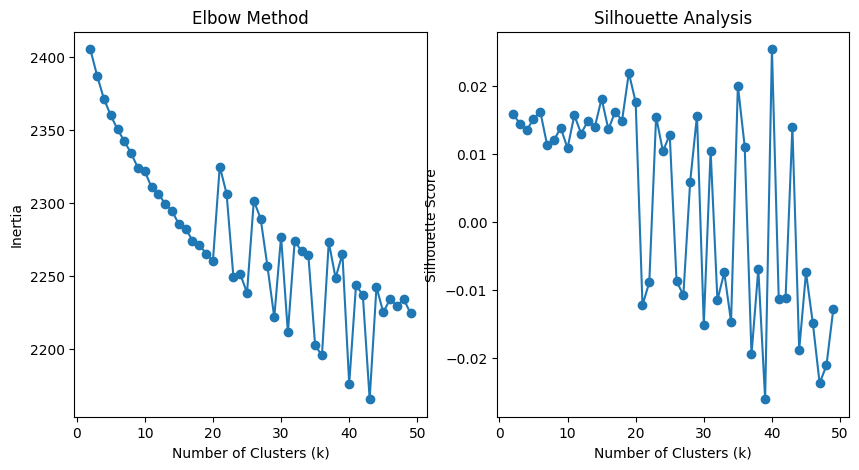

In [163]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method to find optimal clusters
inertia = []
silhouette_scores = []
K_range = range(2, 50)  # Checking for k from 2 to 10

for k in K_range:
    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10, random_state=42)
    model.fit(X)
    
    inertia.append(model.inertia_)  # Sum of squared distances to closest cluster center
    silhouette_scores.append(silhouette_score(X, model.labels_))  # Measure of cluster quality

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.show()

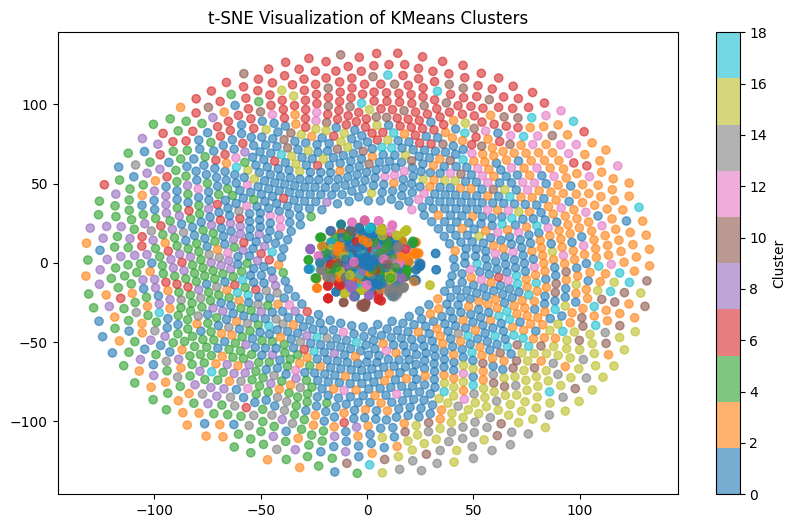

In [156]:
from sklearn.manifold import TSNE

clusters = model.labels_

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X.toarray())

# Plot t-SNE clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=clusters, cmap='tab10', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title("t-SNE Visualization of KMeans Clusters")
plt.show()

In [180]:
# improve the silhouette score by using different tokenizer 

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, tokenizer=process_tweet)

X = vectorizer.fit_transform(News_df.data)

y_true = np.array(News_df.target)

K = 10

model = KMeans(n_clusters=K, init='k-means++', max_iter=1000, n_init=100)

normalizer = Normalizer()

X_normalized = normalizer.fit_transform(X)

model.fit(X_normalized)

# Get the resulting clusters

clusters = model.labels_.tolist()

# clusters = np.array(clusters)


# Print the top terms per cluster

print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names_out()

for i in range(K):

    print("Cluster %d:" % i),

    for ind in order_centroids[i, :30]:

        print(' %s' % terms[ind]),

print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_true, clusters))

print("Completeness: %0.3f" % metrics.completeness_score(y_true, clusters))

print("Silhouette Score: %0.3f" % metrics.silhouette_score(X_normalized, clusters, sample_size=1000))


/home/israa/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/israa/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['u'] not in stop_words.
  warnings.warn(


Top terms per cluster:
Cluster 0:
 ...
 like
 question
 day
 know
 think
 try
 thing
 stuff
 post
 really
 say
 deleted
 use
 used
 bit
 work
 answer
 tell
 come
 kent
 heard
 second
 look
 figure
 time
 maybe
 way
 point
 thought
Cluster 1:
 graphic
 x
 computer
 line
 program
 problem
 version
 like
 point
 know
 need
 software
 number
 looking
 book
 code
 c
 time
 new
 help
 good
 p
 interested
 want
 used
 algorithm
 e
 pc
 using
 use
Cluster 2:
 god
 christian
 jesus
 bible
 christ
 people
 word
 say
 believe
 kent
 faith
 child
 religion
 life
 man
 law
 love
 belief
 sin
 know
 church
 u
 good
 christianity
 jew
 heaven
 follow
 scripture
 right
 want
Cluster 3:
 ..
 space
 idea
 know
 right
 solar
 michael
 maybe
 think
 make
 russian
 mission
 ...
 thing
 time
 use
 like
 way
 basically
 moon
 g
 human
 old
 earth
 class
 using
 satellite
 station
 craft
 talking
Cluster 4:
 image
 bit
 color
 display
 program
 use
 screen
 graphic
 file
 format
 processing
 tiff
 data
 gif
 

In [183]:
import numpy as np
from scipy.stats import mode

def purity_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    clusters = np.unique(y_pred)  # Unique clusters
    correct_preds = 0  # Count correctly classified samples

    for cluster in clusters:
        indices = np.where(y_pred == cluster)[0]  # Get indices of this cluster
        true_labels = y_true[indices]  # Extract true labels for this cluster

        if len(true_labels) == 0:
            continue  # Skip empty clusters

        # Compute the most common true label in this cluster
        majority_label = mode(true_labels, keepdims=True).mode[0]

        # Count how many samples in this cluster belong to the majority label
        correct_preds += np.sum(true_labels == majority_label)

    # Compute purity
    return correct_preds / len(y_true)

# Compute Purity Score for K-Means
kmeans_purity = purity_score(News_df.target, clusters)
print(f"Purity Score for K-Means: {kmeans_purity:.4f}")


Purity Score for K-Means: 0.6990
silhouette_score for K-Means:  0.014411695776757376


In [189]:
print("silhouette_score for K-Means: ", metrics.silhouette_score(X_normalized, clusters, sample_size=1000))

silhouette_score for K-Means:  0.015234054552844222
